# Adult Census Income Dataset Visualization
### Haibin Lai 12211612


This visualization is used to analyze and display the data so that we can try to make decision on choosing which predict model. The main analysis of this dataset is on the report.

Some of the code are from RUBÉN ACEVEDO in his project Adult Census Income EDA & ML:
https://www.kaggle.com/code/eskilie/adult-census-income-eda-ml


## Running Preparation
**Needed Python Version:**
 > \>=3.09 
 My computer runs well in 3.11

**Needed Package:**

| Library    | Version   | Notes       |
|------------|-----------|-------------|
| pandas     | 2.2.1     | Recommended |
| warnings   | in Python | -           |
| matplotlib | 3.8.4     | Recommended |
| numpy      | 1.26.4    | Recommended              |
| seaborn    | 0.12.2    | Recommended              |


In [277]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## 1 Data Preparation and Wrangling 
### 1.1 Data Preparation

We load the data by adding the income line into the csv

In [278]:
# 读取 train.csv 文件
train_data = pd.read_csv("data/traindata.csv")

# 读取trainlabel.txt文件
with open('data/trainlabel.txt', 'r') as file:
    lines = file.readlines()

# 解析文本数据并创建DataFrame
data = {'Label': [line.strip() for line in lines]}
df = pd.DataFrame(data)

# 将DataFrame保存为CSV文件
df.to_csv('data/trainlabel.csv', index=False)

print("trainlabel.txt has been transformed trainlabel.csv")

trainlabel.txt has been transformed trainlabel.csv


In [279]:
# 读取 data.csv 文件，假设数据列名为 'income'
data_df = pd.read_csv("data/trainlabel.csv")

# 将 'income' 数据列添加到 train_df 中
train_data['Income'] = data_df

# 将修改后的 train_df 保存为新的 CSV 文件
train_data.to_csv("data/traindata_preprocessed.csv", index=False)

train_data = pd.read_csv('data/traindata_preprocessed.csv')

train_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Income
0,77,Local-gov,177550,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,3818,0,14,United-States,0
1,40,Self-emp-inc,475322,Bachelors,13,Separated,Craft-repair,Own-child,White,Male,0,0,50,United-States,0
2,29,Self-emp-not-inc,341672,HS-grad,9,Married-spouse-absent,Transport-moving,Other-relative,Asian-Pac-Islander,Male,0,1564,50,India,1
3,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,0
4,22,Private,306967,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,0


In [280]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22792 non-null  int64 
 1   workclass       22792 non-null  object
 2   fnlwgt          22792 non-null  int64 
 3   education       22792 non-null  object
 4   education.num   22792 non-null  int64 
 5   marital.status  22792 non-null  object
 6   occupation      22792 non-null  object
 7   relationship    22792 non-null  object
 8   race            22792 non-null  object
 9   sex             22792 non-null  object
 10  capital.gain    22792 non-null  int64 
 11  capital.loss    22792 non-null  int64 
 12  hours.per.week  22792 non-null  int64 
 13  native.country  22792 non-null  object
 14  Income          22792 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.6+ MB


**Result Explained**
The result tells us there are 9769 rows and 14 columns, and the name of each column, with the data type.
The info() method also tells us how many Non-Null values there are present in each column, and in our data set there are no Null values in our data set.

Empty values, or Null values, can be bad when analyzing data, we do this to clean our data.

In [281]:
train_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
Income            0
dtype: int64

Now we test if the data has unnamed line using “train_data.isna().sum()”

And next we use "train_data.loc[train_data.duplicated() == True\]" to check if we have found the same sample. 

In [282]:
train_data.loc[train_data.duplicated() == True]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Income
5721,44,Private,367749,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,Mexico,0
9853,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,0
15108,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,0
16958,42,Private,204235,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
18372,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,0
18382,23,Private,240137,5th-6th,3,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,55,Mexico,0
19488,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
19733,39,Private,30916,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
20026,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,0
20405,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,0


## Get a bird eye view of the data
Here train_data.describe() will count each data of the file and give us a view that how much level is the data

In [283]:
train_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,Income
count,22792.000000,2.279200e+04,22792.000000,22792.000000,22792.000000,22792.000000,22792.000000
mean,38.514918,1.896628e+05,10.075509,1048.223192,85.975123,40.455291,0.240830
std,13.640207,1.055492e+05,2.584257,7226.283048,400.471450,12.312654,0.427597
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178490e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781145e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.367405e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.455435e+06,16.000000,99999.000000,3900.000000,99.000000,1.000000


## AGE Visualization

We use package sns and plt to draw the age distribution with income

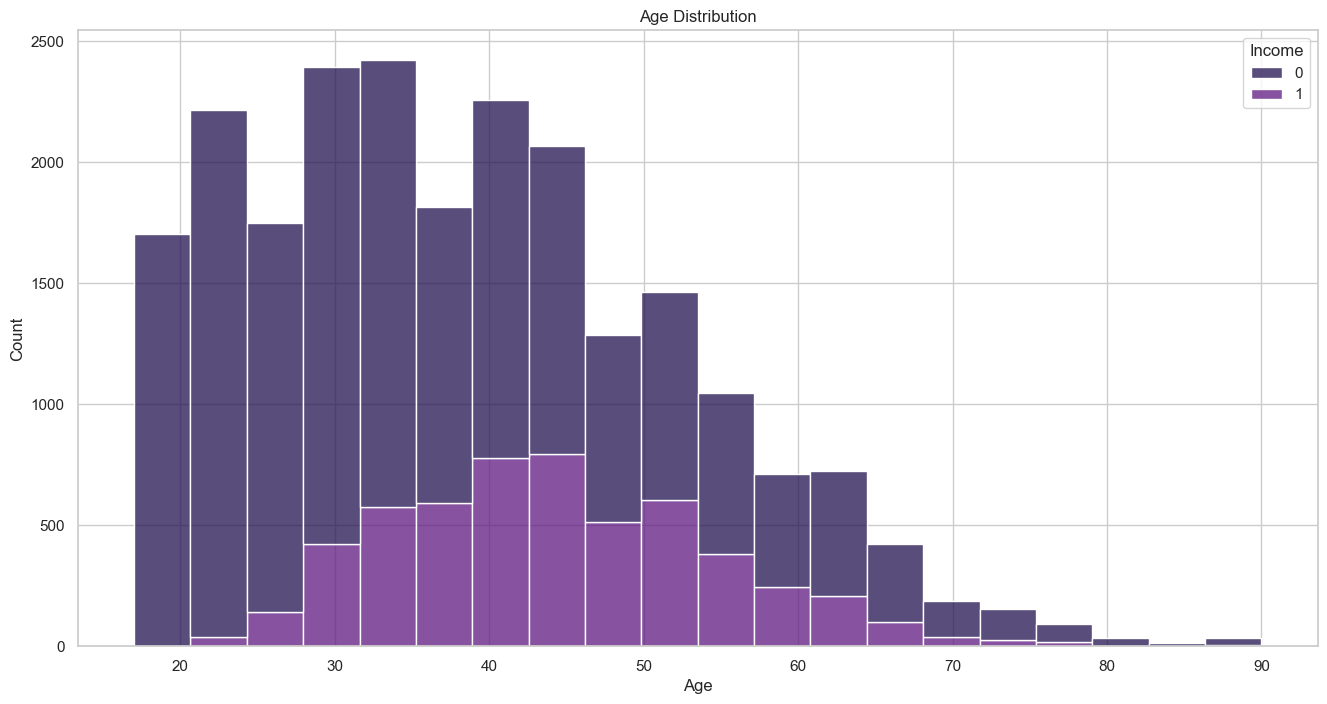

In [284]:
# Age
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
sns.set_theme(style="whitegrid")
sns.set_palette("magma")
sns.histplot(data=train_data, x='age', hue='Income', bins=20, multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

<Axes: ylabel='age'>

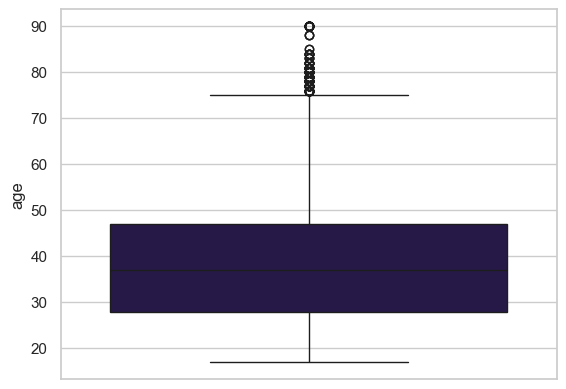

In [285]:
sns.boxplot(train_data['age'])

This code snippet utilizes the boxplot function from the Seaborn library to generate a boxplot for the data contained in train_data\['age'].
A boxplot is a statistical visualization used to display the distribution of data. It provides insights into the central tendency, spread, and presence of outliers in the dataset. Here's an explanation of the components of a boxplot:

1. The central box represents the interquartile range (IQR) of the data, with the line inside the box denoting the median (50th percentile) of the data.
2. The upper and lower boundaries of the box correspond to the third quartile (75th percentile) and the first quartile (25th percentile) of the data, respectively. Hence, the height of the box represents the IQR.
3. "Whiskers" extend from the box to indicate the range of non-outlier data. Typically, they extend to the maximum and minimum observations within a certain range, but in some cases, they may represent other statistical summaries of the data.
4.Any data points beyond the whiskers' range are considered outliers and are usually plotted as individual points.

Boxplots are useful for identifying the central tendency, dispersion, and outliers in the data, facilitating exploratory analysis and comparisons between datasets.


### Age & Sex Visualization Explanation

- `sns.kdeplot`: This function from the Seaborn library is employed to create a kernel density estimation plot. Kernel density estimation is a non-parametric method used to estimate the probability density function of a random variable. It involves placing a kernel (such as a Gaussian kernel) at each observation and smoothing these kernels to generate the density curve.

- `x='age'`: This specifies the numerical variable to be plotted along the x-axis, which in this case is `age`, representing age.

- `hue='sex'`: This is an optional parameter used to group the data based on another variable and differentiate them using different colors. Here, it specifies grouping the data based on the categorical variable `sex`, indicating male and female.

- `data=train_data`: This specifies the dataset to be used. `train_data` is assumed to be a DataFrame or similar data structure containing the data to be plotted.

- `fill=True`: This is a boolean parameter that controls whether to fill the area under the kernel density curve. When set to True, it fills the area under the curve, ensuring the area under the curve sums up to 1.

Therefore, this code segment generates a kernel density estimation plot of the `age` variable in the `train_data` dataset, with differentiation based on the `sex` variable, while also filling the area under the curve.

<Axes: xlabel='age', ylabel='Density'>

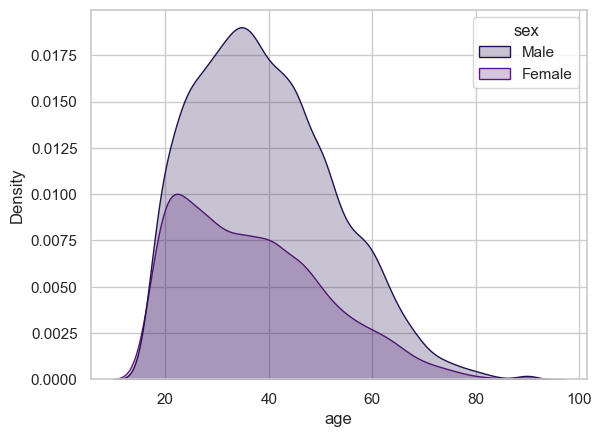

In [286]:
sns.kdeplot(x='age', hue ='sex', data=train_data, fill = True)

## Workclass

Brief view on the size of the Workclass:

In [287]:
train_data.groupby('workclass').size()

workclass
?                    1278
Federal-gov           678
Local-gov            1489
Never-worked            5
Private             15879
Self-emp-inc          792
Self-emp-not-inc     1734
State-gov             929
Without-pay             8
dtype: int64

### Distribution of the work class
The given code utilizes Matplotlib and Seaborn libraries to create a stacked histogram plot:

- `plt.figure(figsize=(16, 8))`: This line sets the size of the figure to (16, 8), meaning 16 inches in width and 8 inches in height. This helps adjust the aspect ratio of the plot.

- `sns.histplot()`: This Seaborn function is used to generate a histogram plot. It visualizes the distribution of a single variable (`workclass` in this case) or the relationship between two variables (`workclass` and `Income`) by binning the data and showing the count of observations in each bin. 

  - `data=train_data`: Specifies the dataset to be used, assumed to be a DataFrame containing the data to be plotted.
  
  - `x='workclass'`: Specifies the variable to be plotted along the x-axis, which here is `workclass`, representing different types of work classes.
  
  - `hue='Income'`: This parameter is used to differentiate the data based on another categorical variable (`Income`), typically by using different colors for different categories. It helps to visualize the distribution of `workclass` categories based on income levels.
  
  - `multiple='stack'`: This parameter specifies that the histograms should be stacked on top of each other rather than displayed side by side. This is useful for comparing the distribution of different `Income` levels within each `workclass` category.

- `plt.xlabel('Workclass')`: Sets the label for the x-axis as "Workclass", indicating the variable being plotted.
  
- `plt.title('Workclass')`: Sets the title of the plot as "Workclass", providing a brief description of the data being visualized.

Therefore, this code segment generates a stacked histogram plot showing the distribution of `workclass` categories based on `Income` levels.


Text(0.5, 1.0, 'Workclass and Income distribution Count')

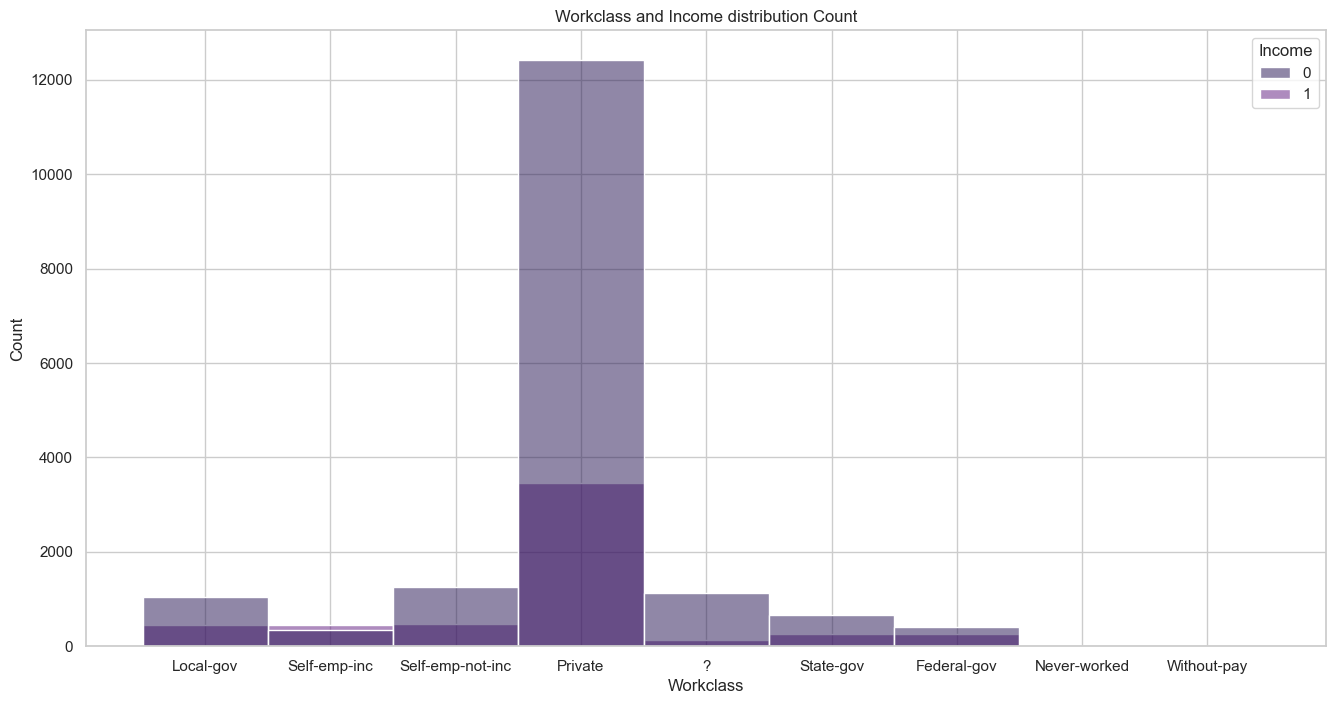

In [288]:
plt.figure(figsize=(16, 8))
sns.histplot(data=train_data, x='workclass', hue='Income')
plt.xlabel('Workclass')
plt.title('Workclass and Income distribution Count')

# Final Weight

The following code generates a stacked histogram plot to visualize the distribution of the 'Final Weight' variable in the dataset:

- `plt.figure(figsize=(16, 8))`: Sets the size of the figure to (16, 8) inches, adjusting the aspect ratio for better visualization.

- `sns.histplot()`: This Seaborn function creates a histogram plot. It bins the data of a single variable (`fnlwgt` in this case) and displays the count of observations in each bin. 

  - `x='fnlwgt'`: Specifies the variable to be plotted along the x-axis, which here is 'fnlwgt' representing the final weight.

  - `data=train_data`: Specifies the dataset to be used, assumed to be a DataFrame containing the data to be plotted.

  - `hue='Income'`: Differentiates the data based on another categorical variable (`Income`). It uses different colors for different categories of income levels.

  - `multiple='stack'`: Specifies that the histograms should be stacked on top of each other, rather than displayed side by side. This facilitates comparison of the distribution of different income levels within each 'Final Weight' category.

- `plt.title('Final Weight distribution')`: Sets the title of the plot as "Final Weight distribution", providing a brief description of the data being visualized.

- `plt.xlabel('Final Weight')`: Labels the x-axis as "Final Weight", indicating the variable being plotted.

Therefore, this code segment generates a stacked histogram plot showing the distribution of 'Final Weight' categories based on 'Income' levels.


Text(0.5, 0, 'Final Weight')

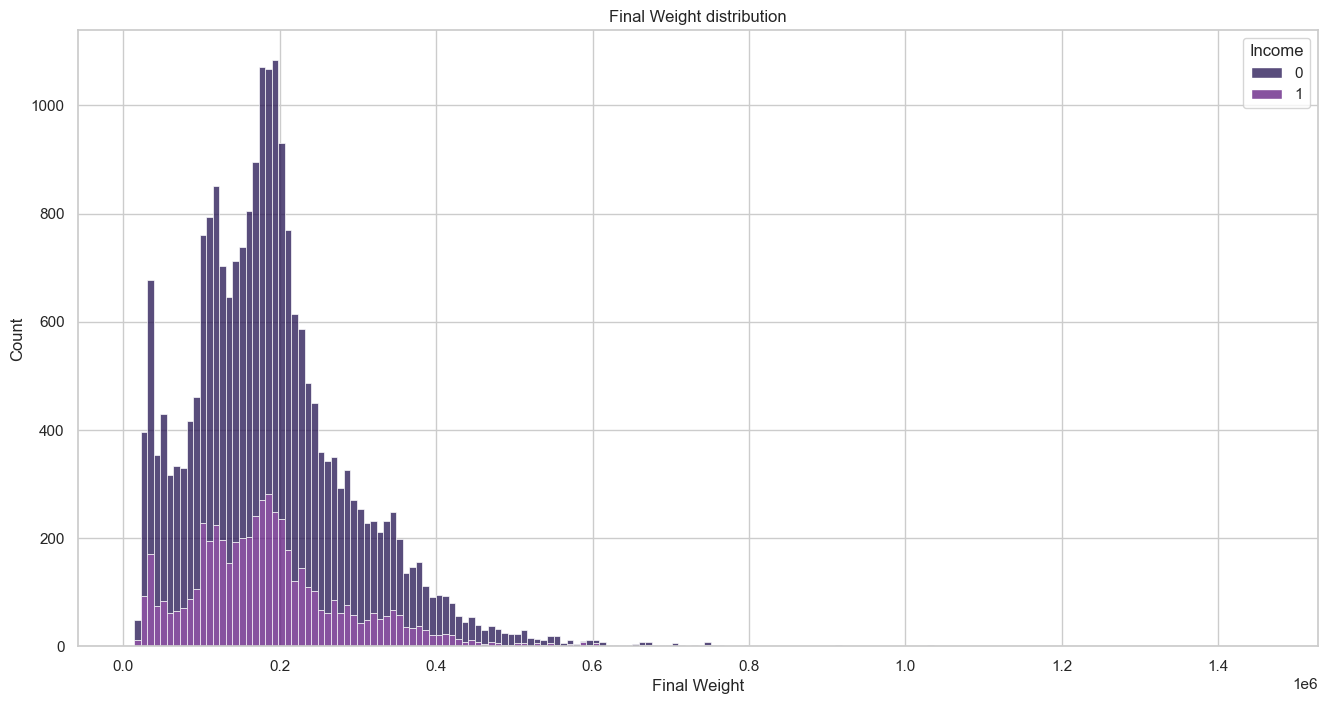

In [289]:
plt.figure(figsize=(16, 8))
sns.histplot(x='fnlwgt', data=train_data, hue='Income', multiple='stack')
plt.title('Final Weight distribution')
plt.xlabel('Final Weight')

## Education

Education is important to people's income. Let's analyze the data:

In [290]:
train_data.groupby('education').size()

education
10th             641
11th             840
12th             292
1st-4th          121
5th-6th          239
7th-8th          451
9th              374
Assoc-acdm       752
Assoc-voc        970
Bachelors       3742
Doctorate        297
HS-grad         7367
Masters         1193
Preschool         39
Prof-school      414
Some-college    5060
dtype: int64

-------------------------
#### Education distribution

Now we try to get a pie chart to see the distribution of education levels in the train_data dataset 
Each wedge of the pie represents a different education level, and the percentage label on each wedge indicates the proportion of that education level in the dataset.

([<matplotlib.patches.Wedge at 0x1dbe6c9b590>,
 [Text(1.0957092707827263, 0.09706283491010402, '10th'),
  Text(1.0532813867675739, 0.3171723826075915, '11th'),
  Text(0.9911972823427058, 0.47699889672454643, '12th'),
  Text(0.9624522419653586, 0.5326215184686542, '1st-4th'),
  Text(0.9348489282998876, 0.5797046500215016, '5th-6th'),
  Text(0.8755726206513547, 0.665862287538286, '7th-8th'),
  Text(0.7943614867485447, 0.7609138113943272, '9th'),
  Text(0.6671890525013423, 0.874562043666635, 'Assoc-acdm'),
  Text(0.4428440100989255, 1.006920643705105, 'Assoc-voc'),
  Text(-0.25628861215194265, 1.0697271368350114, 'Bachelors'),
  Text(-0.7828400880541888, 0.7727621862742186, 'Doctorate'),
  Text(-1.057927635929925, -0.3013123248984682, 'HS-grad'),
  Text(-0.124516921239224, -1.0929297947833179, 'Masters'),
  Text(0.061980178912668216, -1.0982524561420084, 'Preschool'),
  Text(0.13039015779217245, -1.0922446643270602, 'Prof-school'),
  Text(0.8431251170817835, -0.7064984337886595, 'Some-col

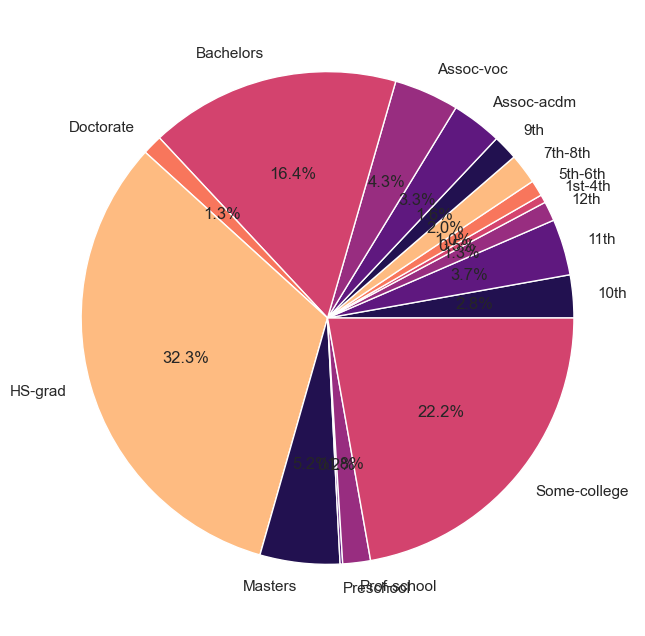

In [291]:
plt.figure(figsize=(16, 8))
plt.pie(train_data.groupby('education').size(), labels=train_data.groupby('education').size().index, autopct='%1.1f%%')

#### Distribution of education and income
Now we will see the relationship of education and the Income

<Axes: xlabel='education', ylabel='count'>

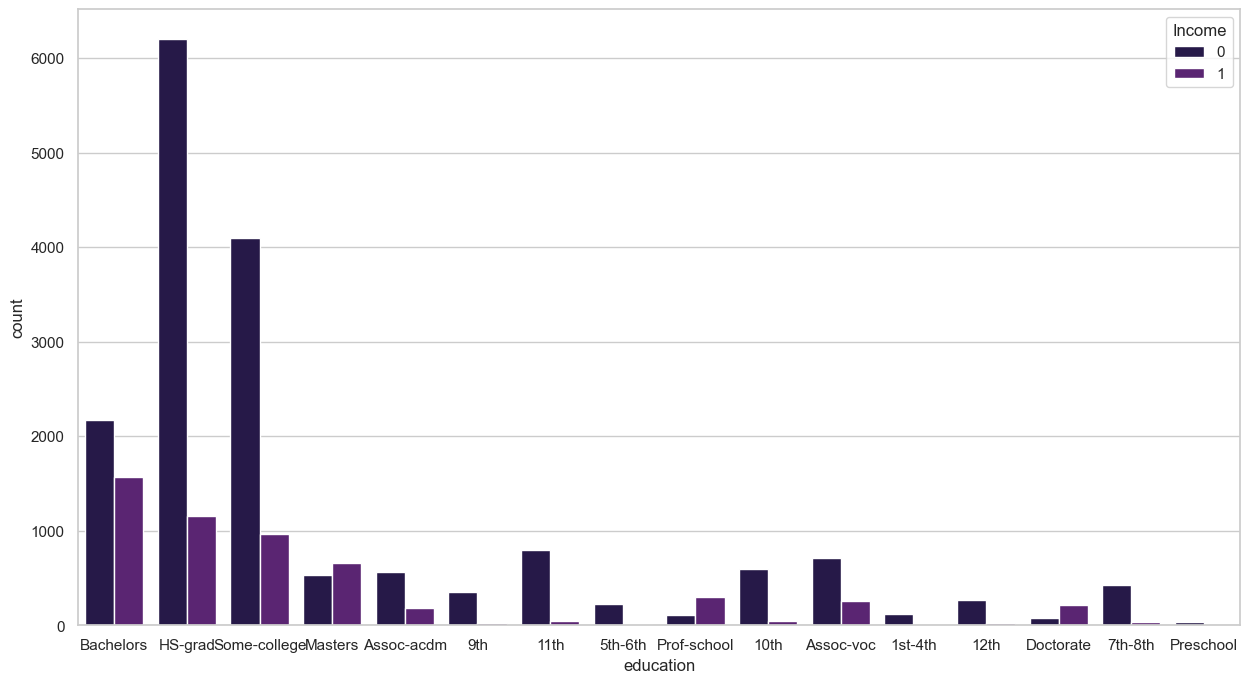

In [292]:
plt.figure(figsize=(15, 8))
sns.countplot(x='education', data=train_data, hue='Income')

#### Distribution of Education Year and Income

<Axes: xlabel='education.num', ylabel='count'>

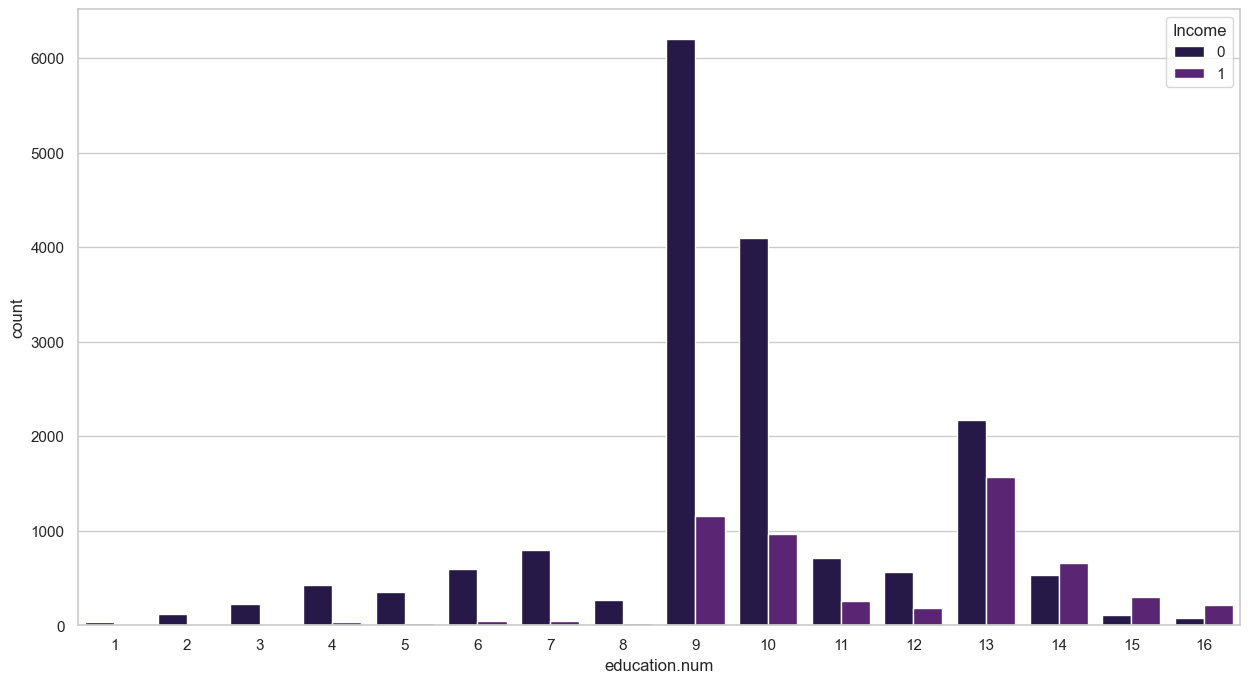

In [293]:
plt.figure(figsize=(15, 8))
sns.countplot(x='education.num', data=train_data, hue='Income')

#### marital status

marital.status
Divorced                  3103
Married-AF-spouse           17
Married-civ-spouse       10452
Married-spouse-absent      291
Never-married             7499
Separated                  736
Widowed                    694
dtype: int64


<Axes: xlabel='marital.status', ylabel='count'>

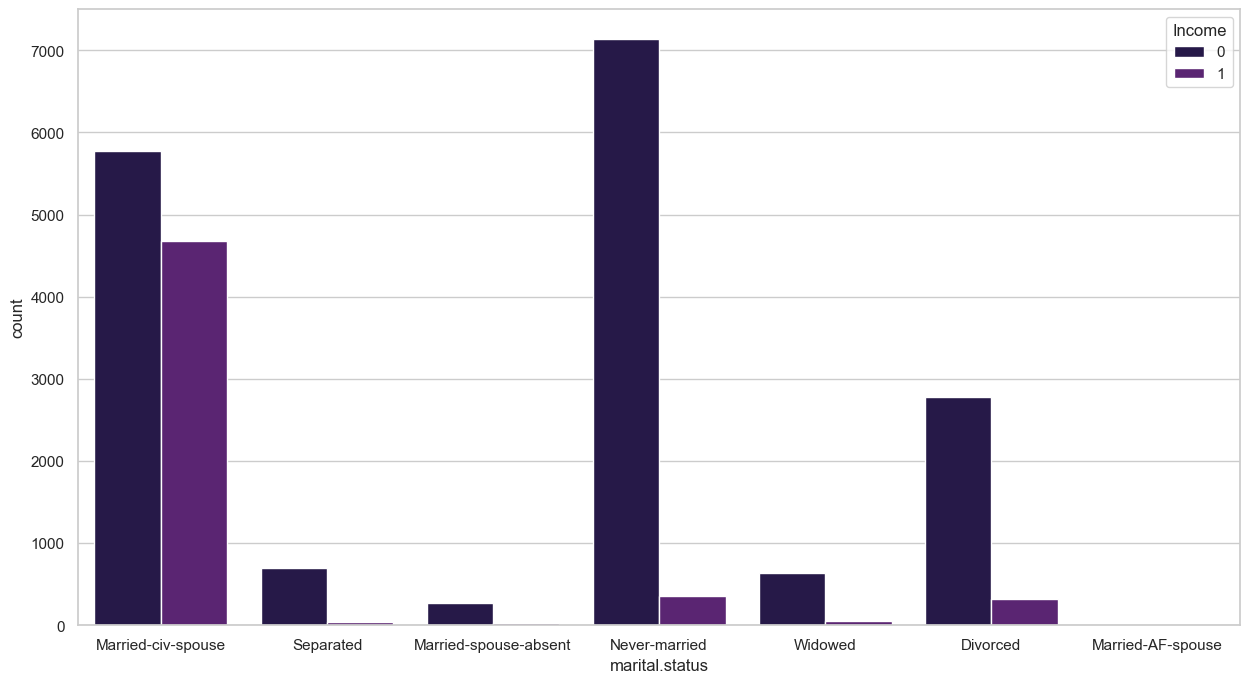

In [294]:
print(train_data.groupby('marital.status').size())
plt.figure(figsize=(15, 8))
sns.countplot(data=train_data, x='marital.status', hue='Income')


#### Occupation

occupation
?                    1283
Adm-clerical         2652
Armed-Forces            7
Craft-repair         2876
Exec-managerial      2772
Farming-fishing       706
Handlers-cleaners     960
Machine-op-inspct    1433
Other-service        2349
Priv-house-serv       110
Prof-specialty       2907
Protective-serv       453
Sales                2505
Tech-support          629
Transport-moving     1150
dtype: int64


Text(0.5, 1.0, 'Occupation Distribution')

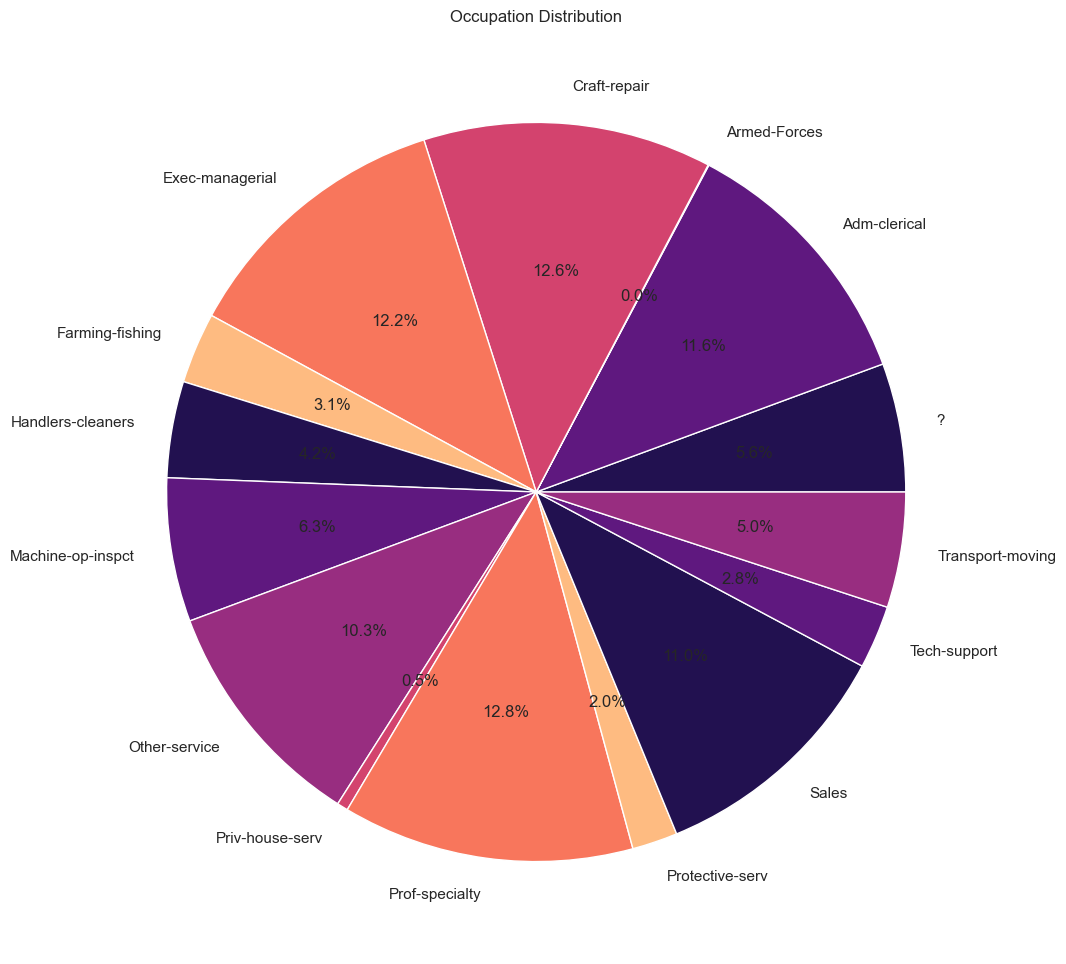

In [295]:
print(train_data.groupby('occupation').size())
plt.figure(figsize=(15, 12))
plt.pie(train_data.groupby('occupation').size(), labels=train_data.groupby('occupation').size().index, autopct='%1.1f%%')
plt.title('Occupation Distribution')


#### Occupation Distribution

Text(0.5, 1.0, 'Occupation Distribution')

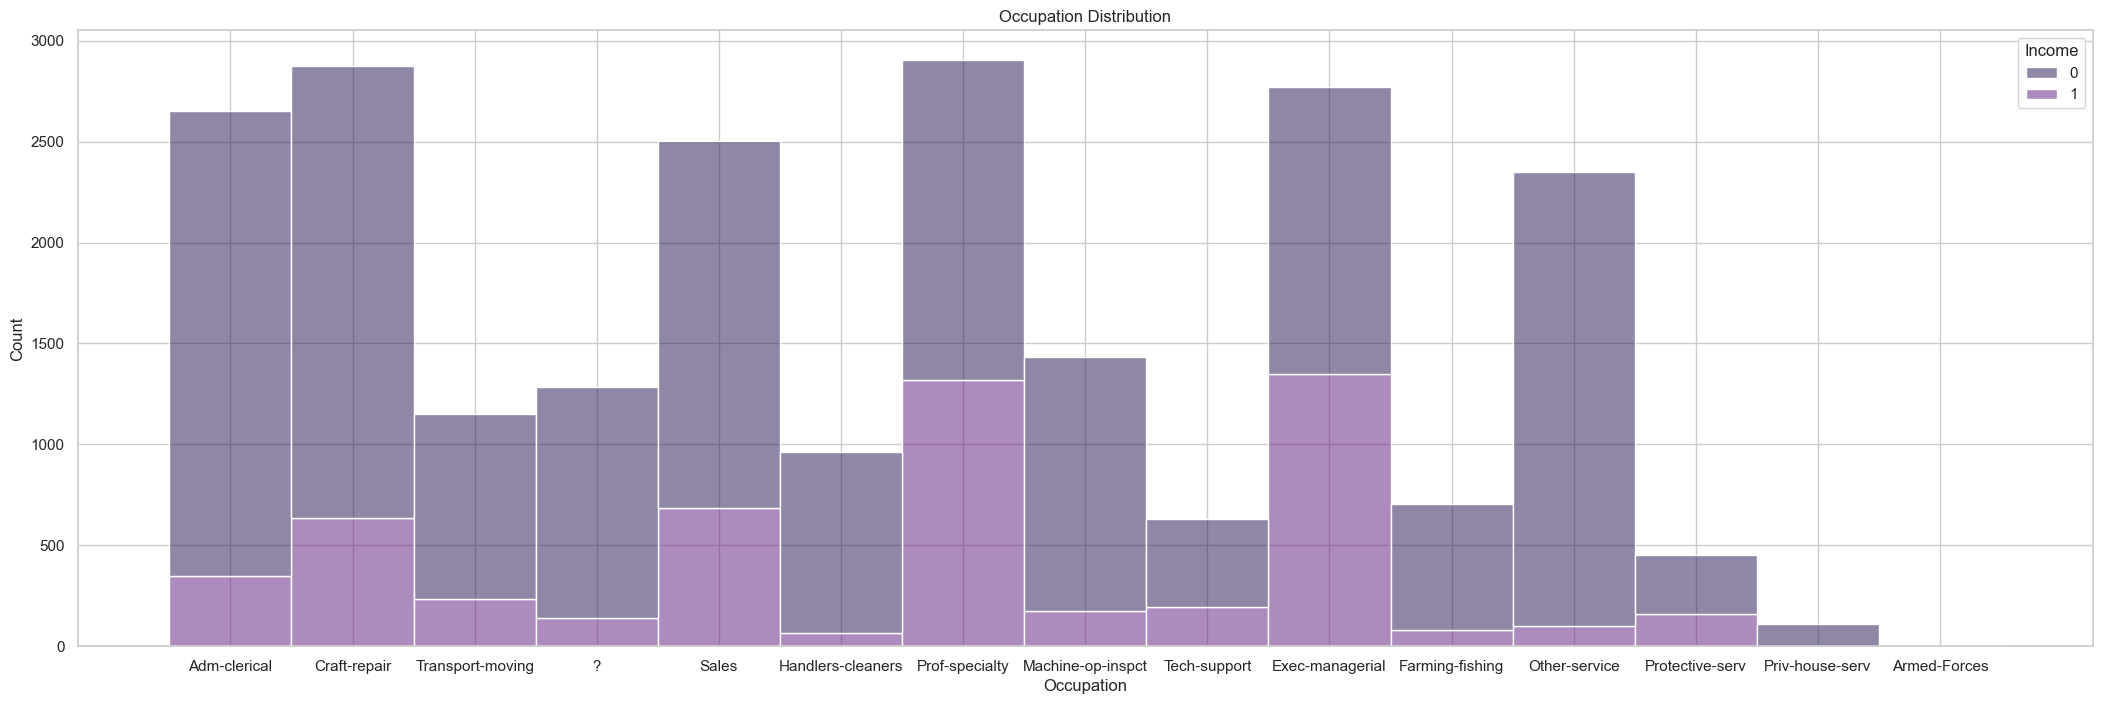

In [296]:
plt.figure(figsize=(26, 8))
sns.histplot(data=train_data, x='occupation', hue='Income', multiple='stack', alpha=0.5)
plt.xlabel('Occupation')    
plt.title('Occupation Distribution')

#### Relationship

relationship
Husband           9207
Not-in-family     5807
Other-relative     709
Own-child         3581
Unmarried         2401
Wife              1087
dtype: int64


<Axes: xlabel='relationship', ylabel='Count'>

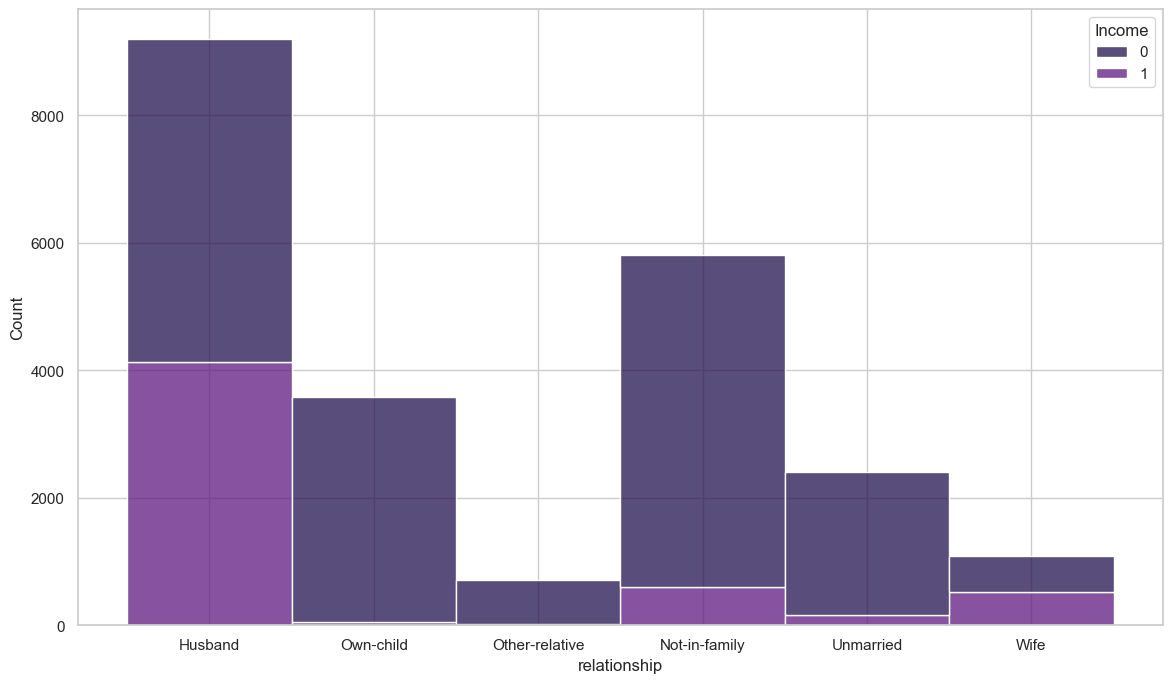

In [297]:
print(train_data.groupby('relationship').size())
plt.figure(figsize=(14, 8))
sns.histplot(data=train_data, x='relationship', hue='Income', multiple='stack')

#### Race and Sex

race
Amer-Indian-Eskimo      212
Asian-Pac-Islander      742
Black                  2169
Other                   193
White                 19476
dtype: int64


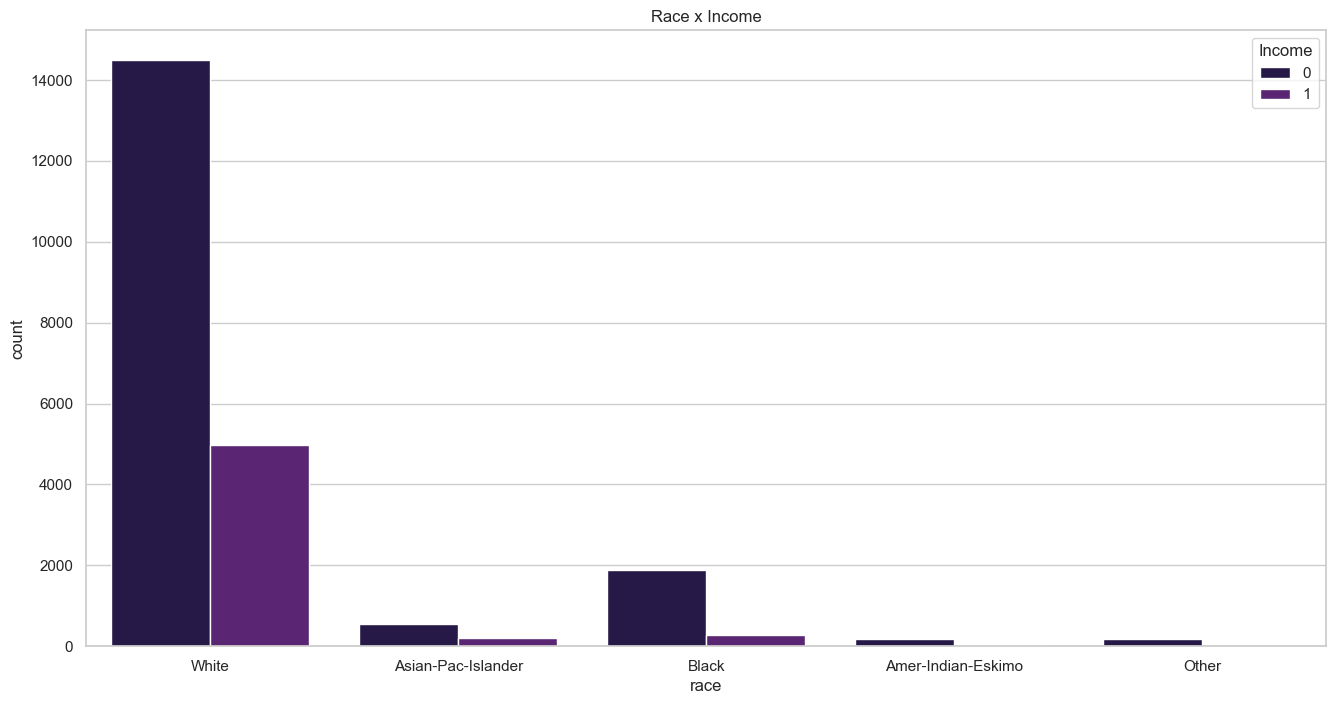

sex
Female     7534
Male      15258
dtype: int64


Text(0.5, 1.0, 'Sex x Income')

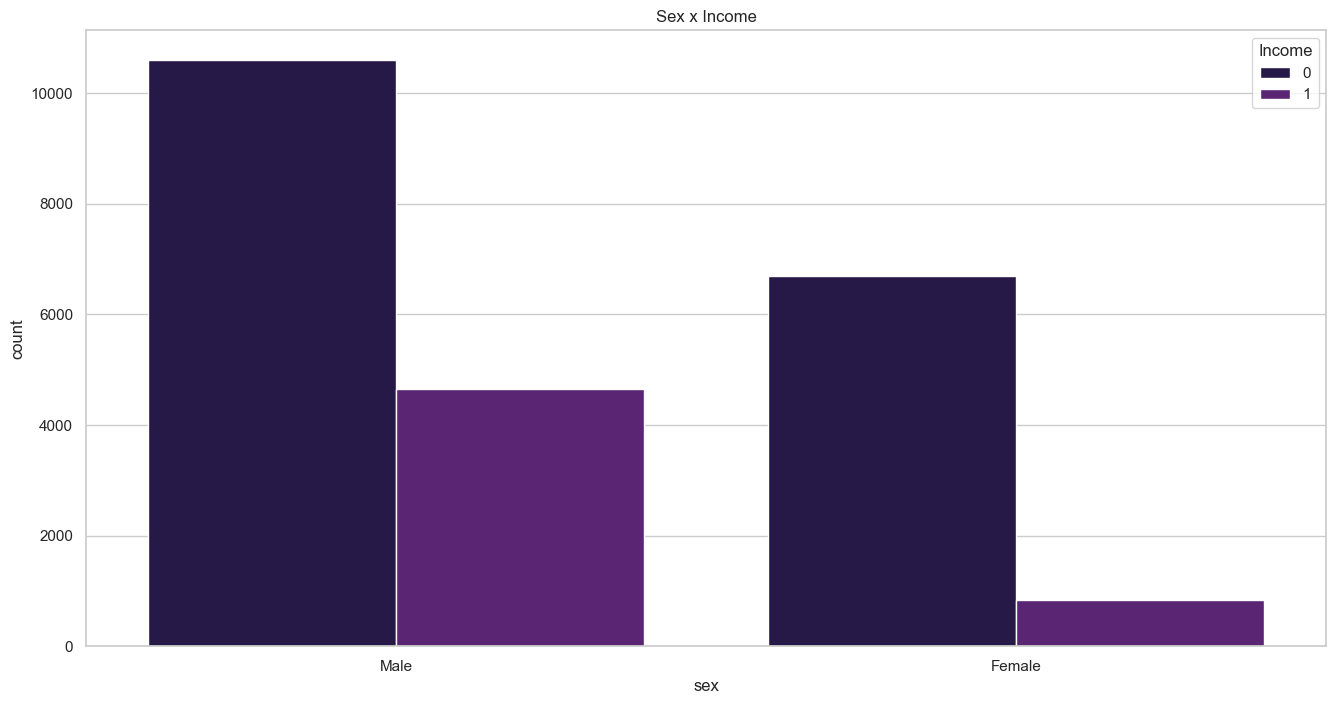

In [298]:
plt.figure(figsize=(16, 8))
print(train_data.groupby(train_data.race).size())
sns.countplot(data=train_data, x='race', hue='Income')
plt.title('Race x Income')
plt.show()
plt.figure(figsize=(16, 8))
print(train_data.groupby(train_data.sex).size())
sns.countplot(data=train_data, x='sex', hue='Income')
plt.title('Sex x Income')

#### Hours per week
![Hours per week](Img/HoursPerWeek.png "AWS")

In [299]:
train_data.groupby('hours.per.week').size()

hours.per.week
1     15
2     24
3     25
4     39
5     37
      ..
92     1
94     1
95     2
98     7
99    55
Length: 92, dtype: int64

#### Native Country
![Country](Img/Country.png "AWS")

In [300]:
train_data.groupby('native.country').size()

native.country
?                               423
Cambodia                         14
Canada                           75
China                            59
Columbia                         38
Cuba                             70
Dominican-Republic               45
Ecuador                          21
El-Salvador                      73
England                          68
France                           19
Germany                          91
Greece                           19
Guatemala                        48
Haiti                            24
Honduras                          8
Hong                             14
Hungary                           8
India                            61
Iran                             27
Ireland                          17
Italy                            56
Jamaica                          56
Japan                            45
Laos                             12
Mexico                          462
Nicaragua                        20
Outlying-US(G

## Corresponding Map:

1. Data Preprocessing:


2. from sklearn.preprocessing import LabelEncoder: Imports the LabelEncoder class from the sklearn.preprocessing module. This class is used for encoding categorical features as numeric labels.
3. train_data = train_data.drop(['education','fnlwgt'],axis=1): Drops the columns 'education' and 'fnlwgt' from the DataFrame train_data.
4. train_data.replace('?',np.NaN,inplace=True): Replaces any occurrences of '?' with NaN (missing values) in the DataFrame train_data.
5. train_data.fillna(method='ffill',inplace=True): Fills missing values using forward fill method, where missing values are replaced using the last valid observation along the column.


6. Label Encoding:


7. le = LabelEncoder(): Initializes a LabelEncoder object.
8. Encodes categorical variables into numerical labels using fit_transform method of LabelEncoder for each categorical column in the DataFrame train_data.


9. Visualization:


10. sns.barplot(x='income',y='age',data=train_data): Creates a bar plot using Seaborn to visualize the relationship between 'income' (x-axis) and 'age' (y-axis) in the train_data DataFrame.
11. sns.heatmap(train_data.corr()): Generates a heatmap using Seaborn to visualize the correlation matrix of the features in the train_data DataFrame.


<Axes: >

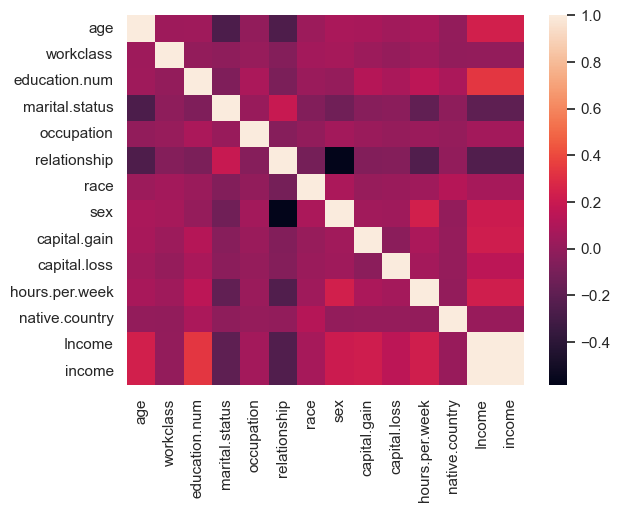

In [301]:
from sklearn.preprocessing import LabelEncoder

train_data = train_data.drop(['education','fnlwgt'],axis=1)
train_data.head(1)

train_data.replace('?',np.NaN,inplace=True)
train_data.head()

train_data.fillna(method='ffill',inplace=True)

le = LabelEncoder()
train_data['workclass'] = le.fit_transform(train_data['workclass'])
train_data['marital.status'] = le.fit_transform(train_data['marital.status'])
train_data['occupation'] = le.fit_transform(train_data['occupation'])
train_data['relationship'] = le.fit_transform(train_data['relationship'])
train_data['race'] = le.fit_transform(train_data['race'])
train_data['sex'] = le.fit_transform(train_data['sex'])
train_data['native.country'] = le.fit_transform(train_data['native.country'])
train_data['income'] = le.fit_transform(train_data['Income'])

sns.barplot(x='income',y='age',data=train_data)
train_data.head()
sns.heatmap(train_data.corr())